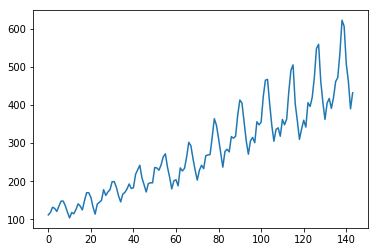

In [5]:
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()

Epoch 1/100
1s - loss: 0.0413
Epoch 2/100
0s - loss: 0.0202
Epoch 3/100
0s - loss: 0.0145
Epoch 4/100
0s - loss: 0.0131
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0111
Epoch 7/100
0s - loss: 0.0102
Epoch 8/100
0s - loss: 0.0093
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0038
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

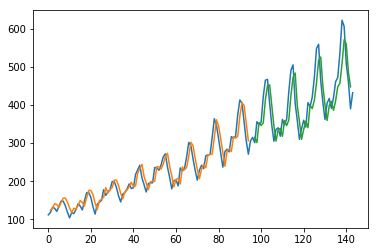

In [41]:
# LSTM for international airline passengers problem with regression framing
EPOCHS = 100 # was 100
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=EPOCHS, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# LSTM for international airline passengers problem with window regression framing
EPOCHS = 100 # was 100
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=EPOCHS, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# LSTM for international airline passengers problem with time step regression framing
EPOCHS = 100 # was 100
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=EPOCHS, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# LSTM for international airline passengers problem with memory
EPOCHS = 1000 # was 100
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(EPOCHS):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/1
2s - loss: 0.0057
Epoch 1/1
1s - loss: 0.0141
Epoch 1/1
1s - loss: 0.0099
Epoch 1/1
1s - loss: 0.0072
Epoch 1/1
1s - loss: 0.0060
Epoch 1/1
1s - loss: 0.0057
Epoch 1/1
1s - loss: 0.0056
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0055
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0054
Epoch 1/1
1s - loss: 0.0053
Epoch 1/1
1s - loss:

1s - loss: 0.0014
Epoch 1/1
1s - loss: 0.0020
Epoch 1/1
1s - loss: 0.0019
Epoch 1/1
1s - loss: 0.0016
Epoch 1/1
1s - loss: 0.0014
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0013
Epoch 1/1
1s - loss: 0.0015
Epoch 1/1
1s - loss: 0.0013
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0013
Epoch 1/1
1s - loss: 0.0013
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0010
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0012
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0010
Epoch 1/1
1s - loss: 0.0010
Epoch 1/1
1s - loss: 0.0010
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0011
Epoch 1/1
1s - loss: 0.0012
Ep

1s - loss: 9.4319e-04
Epoch 1/1
1s - loss: 9.4869e-04
Epoch 1/1
1s - loss: 9.4453e-04
Epoch 1/1
1s - loss: 9.3977e-04
Epoch 1/1
1s - loss: 9.3194e-04
Epoch 1/1
1s - loss: 9.2119e-04
Epoch 1/1
1s - loss: 9.1685e-04
Epoch 1/1
1s - loss: 9.1303e-04
Epoch 1/1
1s - loss: 9.0943e-04
Epoch 1/1
1s - loss: 9.0792e-04
Epoch 1/1
1s - loss: 9.0689e-04
Epoch 1/1
1s - loss: 9.0604e-04
Epoch 1/1
1s - loss: 9.0523e-04
Epoch 1/1
1s - loss: 9.0395e-04
Epoch 1/1
1s - loss: 9.0197e-04
Epoch 1/1
1s - loss: 8.9895e-04
Epoch 1/1
1s - loss: 8.9569e-04
Epoch 1/1
1s - loss: 8.9151e-04
Epoch 1/1
1s - loss: 8.8854e-04
Epoch 1/1
1s - loss: 8.8504e-04
Epoch 1/1
1s - loss: 8.8213e-04
Epoch 1/1
1s - loss: 8.7918e-04
Epoch 1/1
1s - loss: 8.7633e-04
Epoch 1/1
1s - loss: 8.7166e-04
Epoch 1/1
1s - loss: 8.6466e-04
Epoch 1/1
1s - loss: 8.5992e-04
Epoch 1/1
1s - loss: 8.5597e-04
Epoch 1/1
1s - loss: 8.5157e-04
Epoch 1/1
1s - loss: 8.4678e-04
Epoch 1/1
1s - loss: 8.4400e-04
Epoch 1/1
1s - loss: 8.3681e-04
Epoch 1/1
1s - los

1s - loss: 5.9239e-04
Epoch 1/1
1s - loss: 6.1840e-04
Epoch 1/1
1s - loss: 5.9026e-04
Epoch 1/1
1s - loss: 6.2018e-04
Epoch 1/1
1s - loss: 5.9238e-04
Epoch 1/1
1s - loss: 6.2479e-04
Epoch 1/1
1s - loss: 5.9206e-04
Epoch 1/1
1s - loss: 6.2615e-04
Epoch 1/1
1s - loss: 5.9733e-04
Epoch 1/1
1s - loss: 6.3143e-04
Epoch 1/1
1s - loss: 6.0352e-04
Epoch 1/1
1s - loss: 6.4421e-04
Epoch 1/1
1s - loss: 6.0046e-04
Epoch 1/1
1s - loss: 6.2586e-04
Epoch 1/1
1s - loss: 5.9831e-04
Epoch 1/1
1s - loss: 6.3217e-04
Epoch 1/1
1s - loss: 6.0282e-04
Epoch 1/1
1s - loss: 6.3660e-04
Epoch 1/1
1s - loss: 6.0478e-04
Epoch 1/1
1s - loss: 6.3628e-04
Epoch 1/1
1s - loss: 6.0511e-04
Epoch 1/1
1s - loss: 6.4177e-04
Epoch 1/1
1s - loss: 6.0834e-04
Epoch 1/1
1s - loss: 6.3654e-04
Epoch 1/1
1s - loss: 6.0310e-04
Epoch 1/1
1s - loss: 6.1980e-04
Epoch 1/1
1s - loss: 5.9915e-04
Epoch 1/1
1s - loss: 6.1773e-04
Epoch 1/1
1s - loss: 6.0093e-04
Epoch 1/1
1s - loss: 6.3259e-04
Epoch 1/1
1s - loss: 6.0962e-04
Epoch 1/1
1s - los

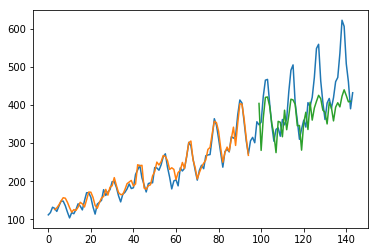

In [40]:
# Stacked LSTM for international airline passengers problem with memory
EPOCHS = 1000 # was 100
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(EPOCHS):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()